In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time

import sys
sys.path.insert(0, '/Users/mariavincenzi/PhD/pycoco_2/')
import Generate_grid_INPUT as grid_input

%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
TMPL_path = '/Users/mariavincenzi/PhD/pycoco_2/SNANA_GRIDs/Templates/'
pycoco_path = '/Users/mariavincenzi/PhD/pycoco_2/data/results_template/'
final_table = pd.read_csv('/Users/mariavincenzi/PhD/pycoco_2/data/info/FINAL_info.dat')#[:-3]


In [3]:
final_table.Name.values

array(['ASASSN14jb', 'ASASSN15oz', 'SN1987A', 'SN1993J', 'SN1994I',
       'SN1998bw', 'SN1999dn', 'SN1999em', 'SN2002ap', 'SN2004aw',
       'SN2004et', 'SN2004fe', 'SN2004gq', 'SN2004gt', 'SN2004gv',
       'SN2005bf', 'SN2005cs', 'SN2005hg', 'SN2006T', 'SN2006aa',
       'SN2006aj', 'SN2006ep', 'SN2007Y', 'SN2007gr', 'SN2007od',
       'SN2007pk', 'SN2007ru', 'SN2007uy', 'SN2008D', 'SN2008aq',
       'SN2008ax', 'SN2008bj', 'SN2008bo', 'SN2008fq', 'SN2008in',
       'SN2009N', 'SN2009bb', 'SN2009bw', 'SN2009dd', 'SN2009ib',
       'SN2009ip', 'SN2009iz', 'SN2009jf', 'SN2009kr', 'SN2010al',
       'SN2011bm', 'SN2011dh', 'SN2011ei', 'SN2011fu', 'SN2011hs',
       'SN2011ht', 'SN2012A', 'SN2012ap', 'SN2012au', 'SN2012aw',
       'SN2013ab', 'SN2013am', 'SN2013by', 'SN2013df', 'SN2013ej',
       'SN2013fs', 'SN2013ge', 'SN2014G', 'SN2016X', 'SN2016bkv',
       'SN2016gkg', 'iPTF13bvn'], dtype=object)

In [4]:
peak_dicts = dict(zip(final_table.Name.values, np.array(final_table['mjd Lbol peak'].values, dtype=float)))


In [5]:
SNe_lista = final_table.Name.values[final_table.SIMS.values]
type_lista = final_table.Type.values[final_table.SIMS.values]



In [6]:
len(SNe_lista)

67

In [7]:
[i for i in zip(SNe_lista, type_lista)]

[('ASASSN14jb', 'II'),
 ('ASASSN15oz', 'II'),
 ('SN1987A', 'II'),
 ('SN1993J', 'IIb'),
 ('SN1994I', 'Ic'),
 ('SN1998bw', 'Ic-BL'),
 ('SN1999dn', 'Ib'),
 ('SN1999em', 'II'),
 ('SN2002ap', 'Ic-BL'),
 ('SN2004aw', 'Ic'),
 ('SN2004et', 'II'),
 ('SN2004fe', 'Ic'),
 ('SN2004gq', 'Ib'),
 ('SN2004gt', 'Ic'),
 ('SN2004gv', 'Ib'),
 ('SN2005bf', 'Ib'),
 ('SN2005cs', 'II'),
 ('SN2005hg', 'Ib'),
 ('SN2006T', 'IIb'),
 ('SN2006aa', 'IIn'),
 ('SN2006aj', 'Ic-BL'),
 ('SN2006ep', 'Ib'),
 ('SN2007Y', 'Ib'),
 ('SN2007gr', 'Ic'),
 ('SN2007od', 'II'),
 ('SN2007pk', 'IIn'),
 ('SN2007ru', 'Ic-BL'),
 ('SN2007uy', 'Ib'),
 ('SN2008D', 'Ib'),
 ('SN2008aq', 'IIb'),
 ('SN2008ax', 'IIb'),
 ('SN2008bj', 'II'),
 ('SN2008bo', 'IIb'),
 ('SN2008fq', 'IIn'),
 ('SN2008in', 'II'),
 ('SN2009N', 'II'),
 ('SN2009bb', 'Ic-BL'),
 ('SN2009bw', 'II'),
 ('SN2009dd', 'II'),
 ('SN2009ib', 'II'),
 ('SN2009ip', 'IIn'),
 ('SN2009iz', 'Ib'),
 ('SN2009jf', 'Ib'),
 ('SN2009kr', 'II'),
 ('SN2010al', 'IIn'),
 ('SN2011bm', 'Ic'),
 ('SN2011dh'

In [41]:
using_hostNOTcorrected = False

In [42]:
extend_with_sudo_spec = False
phase_extended = grid_input.Phase_grid #np.arange(-25, 100, 2)
wls_fake = np.arange(1605., 11005., 5)
flux_fake = 10**-12

for sn in ['SN2006aj']:#SNe_lista[:]:
    print (sn)
    header = """### %s.SED ###
### Mangled with pycoco, corrected for Host Extinction and MW
### %i-%i-%i, M. Vincenzi
"""%(sn, time.localtime().tm_year, time.localtime().tm_mon, time.localtime().tm_mday) 
    header_noHostCorr = """### %s.SED ###
### Mangled with pycoco, NOT corrected for Host Extinction, corrected for MW
### %i-%i-%i, M. Vincenzi
"""%(sn, time.localtime().tm_year, time.localtime().tm_mon, time.localtime().tm_mday) 

    if using_hostNOTcorrected:
        final_spectra_path = pycoco_path+'%s/FINAL_spectra_2dim/HostNotCorr/'%(sn)
    else: 
        final_spectra_path = pycoco_path+'%s/FINAL_spectra_2dim/'%(sn)
        
    final_spectra = [f for f in os.listdir(final_spectra_path) \
                         if os.path.isfile(os.path.join(final_spectra_path, f))&('.txt' in f)]
    peak = peak_dicts[sn]
    mjds = np.array([f[:8] for f in final_spectra], dtype=float)
    if len(np.unique(mjds))!=len(mjds):
        repeat_mjd = np.unique(mjds[(np.array([list(mjds).count(m) for m in mjds])==2)])[0]
        mjds[(np.array([list(mjds).count(m) for m in mjds])==2)] = np.array([repeat_mjd, repeat_mjd+0.01])
    phase = mjds-peak
    
    if using_hostNOTcorrected:
        fout = open(TMPL_path+'/PyCoCo_noHostCorr/pycoco_%s_noHostCorr.SED'%sn, 'w')
        fout.write(header_noHostCorr)
    else:
        fout = open(TMPL_path+'/PyCoCo/pycoco_%s.SED'%sn, 'w')
        fout.write(header)

    
    if not extend_with_sudo_spec:
        phase_extended = phase
    
    for ph in phase_extended[phase_extended<min(phase)]:
        for w in wls_fake:
            fout.write('%.3f\t%.2f\t%.2E\n'%(ph,w,flux_fake))
    for ph,s in zip(phase, final_spectra):
        spec = pd.read_csv(final_spectra_path+s, delimiter='\t')
        resample_flux = np.interp(wls_fake, spec['#wls'].values, spec['flux'].values,
             right=np.nan, left=np.nan)
        resample_fluxerr = np.interp(wls_fake, spec['#wls'].values, spec['fluxerr'].values,
             right=np.nan, left=np.nan)
        resample_spec = pd.DataFrame.from_items(zip(spec.columns,[wls_fake, resample_flux, resample_fluxerr])).dropna()

        if max(resample_spec['#wls']<11000):
            wls_ext = wls_fake[wls_fake>max(resample_spec['#wls'])]
            flux_ext = np.ones(len(wls_ext))*flux_fake
            flux_err_ext = np.ones(len(wls_ext))*flux_fake
            extend_spec = resample_spec.append(pd.DataFrame.from_items(zip(resample_spec.columns,
                                                                  [wls_ext, flux_ext, flux_err_ext])), ignore_index=True)
        else:
            extend_spec = resample_spec.copy()
        if min(resample_spec['#wls']>min(wls_fake)): 
            print (sn, 'MIN', min(resample_spec['#wls']))
        extend_spec['phase']=ph
        for p,w,f in extend_spec[['phase', '#wls','flux']].values:
            fout.write('%.3f %.2f %.2E\n'%(p,w,f))
    for ph in phase_extended[phase_extended>max(phase)]:
        for w in wls_fake:
            fout.write('%.3f %.2f %.2E\n'%(ph,w,flux_fake))

    fout.close()

SN2006aj


In [10]:
name2typ = dict(zip(final_table.Name.values,final_table.Type.values))
name2typ = dict(zip(final_table.Name.values,final_table.Type.values))

In [11]:
final_table.sort_index(by=['Type', 'M_B']).Name.values

/Users/mariavincenzi/anaconda2_7/envs/myenv/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  if __name__ == '__main__':


array(['SN2013by', 'ASASSN15oz', 'SN2014G', 'SN2007od', 'SN2013ej',
       'SN2013fs', 'SN2008bj', 'SN2016X', 'SN2009bw', 'SN2013ab',
       'SN2004et', 'SN2012aw', 'SN2008in', 'SN2009dd', 'SN1999em',
       'SN2009kr', 'ASASSN14jb', 'SN2012A', 'SN2009ib', 'SN2013am',
       'SN2009N', 'SN2005cs', 'SN2016bkv', 'SN1987A', 'SN2011fu',
       'SN2006T', 'SN2008ax', 'SN2016gkg', 'SN2008aq', 'SN2011ei',
       'SN2011dh', 'SN2013df', 'SN2011hs', 'SN2008bo', 'SN1993J',
       'SN2008fq', 'SN2010al', 'SN2007pk', 'SN2009ip', 'SN2006aa',
       'SN2011ht', 'SN2005bf', 'SN2007uy', 'SN2005hg', 'SN2009iz',
       'SN2009jf', 'SN2004gv', 'SN2012au', 'SN2006ep', 'SN2004gq',
       'SN1999dn', 'iPTF13bvn', 'SN2008D', 'SN2007Y', 'SN2004aw',
       'SN1994I', 'SN2004fe', 'SN2004gt', 'SN2013ge', 'SN2007gr',
       'SN2011bm', 'SN2006aj', 'SN1998bw', 'SN2009bb', 'SN2007ru',
       'SN2012ap', 'SN2002ap'], dtype=object)

In [12]:
for sn in final_table.sort_index(by=['Type', 'M_B']).Name.values:
    if using_hostNOTcorrected:
        final_spectra_path = pycoco_path+'%s/FINAL_spectra_2dim/HostNotCorr/'%(sn)
    else: 
        final_spectra_path = pycoco_path+'%s/FINAL_spectra_2dim/'%(sn)
    final_spectra = [f for f in os.listdir(final_spectra_path) \
                         if os.path.isfile(os.path.join(final_spectra_path, f))&('.txt' in f)]
    peak = peak_dicts[sn]
    
    mjds = np.array([f[:8] for f in final_spectra], dtype=float)
    phase = mjds-peak
    #print (sn, peak, min(phase), max(phase))
    print ('%0-10s  '%sn,'%0-6s'%name2typ[sn], '  %0-3i'%min(phase) , '  %0-3i'%max(phase))

/Users/mariavincenzi/anaconda2_7/envs/myenv/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  if __name__ == '__main__':


SN2013by     II       -9    190
ASASSN15oz   II       -6    192
SN2014G      II       -12   186
SN2007od     II       -7    190
SN2013ej     II       -12   186
SN2013fs     II       -7    125
SN2008bj     II       -15   182
SN2016X      II       -10   188
SN2009bw     II       -6    192
SN2013ab     II       -6    192
SN2004et     II       -14   243
SN2012aw     II       -9    240
SN2008in     II       -6    192
SN2009dd     II       -11   221
SN1999em     II       -6    191
SN2009kr     II       -10   77 
ASASSN14jb   II       -9    189
SN2012A      II       -13   186
SN2009ib     II       -14   247
SN2013am     II       -9    272
SN2009N      II       -10   122
SN2005cs     II       -5    193
SN2016bkv    II       -7    191
SN1987A      II       -78   120
SN2011fu     IIb      -3    194
SN2006T      IIb      -18   146
SN2008ax     IIb      -20   178
SN2016gkg    IIb      -21   177
SN2008aq     IIb      -17   180
SN2011ei     IIb      -17   131
SN2011dh     IIb      -22   269
SN2013df

In [13]:
#for sn in SNe_lista:
#    snana_templ = np.genfromtxt(TMPL_path+'pycoco_%s.SED'%sn)
#    print ('°°°°',sn)
#    print (min(snana_templ[:,0]),max(snana_templ[:,0]))
#    print (min(snana_templ[:,1]),max(snana_templ[:,1]))
#    print (min(snana_templ[:,2]),max(snana_templ[:,2]))

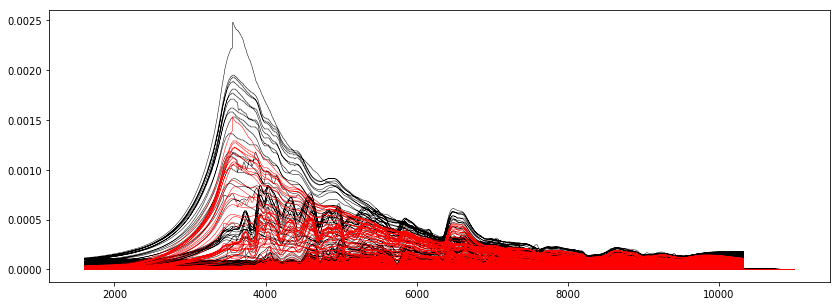

In [14]:
snana_templ = np.genfromtxt(TMPL_path+'PyCoCo/pycoco_%s.SED'%'SN1993J')
figure=plt.figure(1, figsize=(14,5))
plt.plot(snana_templ[:,1], snana_templ[:,2], color='k',lw=0.5)


snana_templ = np.genfromtxt(TMPL_path+'PyCoCo_noHostCorr/pycoco_%s_noHostCorr.SED'%'SN1993J')
figure=plt.figure(1, figsize=(14,5))
plt.plot(snana_templ[:,1], snana_templ[:,2], color='r',lw=0.5)



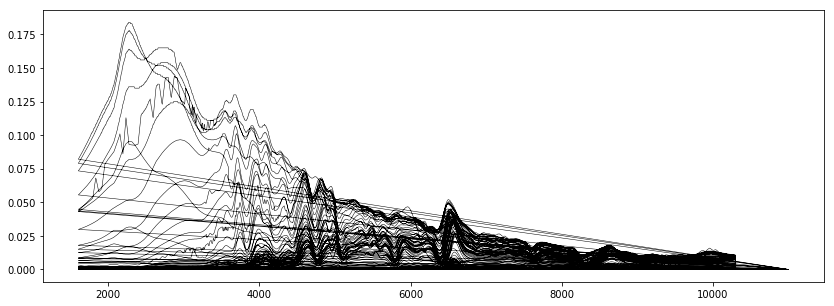

In [15]:
snana_templ = np.genfromtxt(TMPL_path+'PyCoCo/pycoco_%s.SED'%'SN2013ej')
figure=plt.figure(1, figsize=(14,5))
plt.plot(snana_templ[:,1], snana_templ[:,2], color='k',lw=0.5)



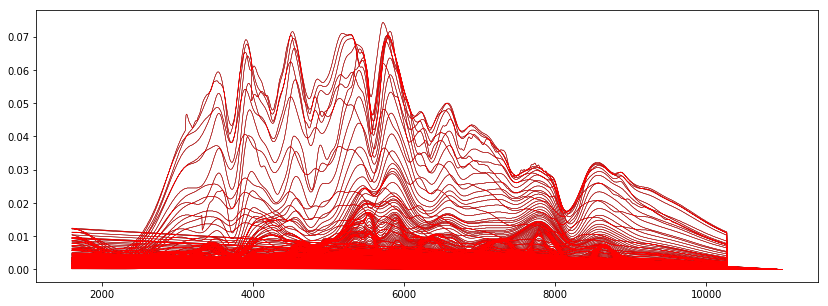

In [25]:
snana_templ = np.genfromtxt(TMPL_path+'PyCoCo_noHostCorr/pycoco_%s_noHostCorr.SED'%'SN2012au')
figure=plt.figure(1, figsize=(14,5))
plt.plot(snana_templ[:,1], snana_templ[:,2], color='k',lw=0.5)

snana_templ = np.genfromtxt(TMPL_path+'PyCoCo/pycoco_%s.SED'%'SN2012au')
figure=plt.figure(1, figsize=(14,5))
plt.plot(snana_templ[:,1], snana_templ[:,2], color='r',lw=0.5)




In [29]:
#for sn in SNe_lista:
print ('scp -r PyCoCo mvincen@login1.sciama.icg.port.ac.uk:/users/mvincen/SNANA_DATA/snsed/NON1A/')
print ('scp -r PyCoCo_noHostCorr mvincen@login1.sciama.icg.port.ac.uk:/users/mvincen/SNANA_DATA/snsed/NON1A/\n')


scp -r PyCoCo mvincen@login1.sciama.icg.port.ac.uk:/users/mvincen/SNANA_DATA/snsed/NON1A/
scp -r PyCoCo_noHostCorr mvincen@login1.sciama.icg.port.ac.uk:/users/mvincen/SNANA_DATA/snsed/NON1A/



In [27]:
print ('scp PyCoCo/pycoco_SN2012au.SED mvincen@login6.sciama.icg.port.ac.uk:/users/mvincen/SNANA_DATA/snsed/NON1A/PyCoCo/')
print ('scp PyCoCo_noHostCorr/pycoco_SN2012au_noHostCorr.SED mvincen@login6.sciama.icg.port.ac.uk:/users/mvincen/SNANA_DATA/snsed/NON1A/PyCoCo_noHostCorr/')



scp PyCoCo/pycoco_SN2012au.SED mvincen@login6.sciama.icg.port.ac.uk:/users/mvincen/SNANA_DATA/snsed/NON1A/PyCoCo/
scp PyCoCo_noHostCorr/pycoco_SN2012au_noHostCorr.SED mvincen@login6.sciama.icg.port.ac.uk:/users/mvincen/SNANA_DATA/snsed/NON1A/PyCoCo_noHostCorr/


In [28]:
#for sn in SNe_lista:
print ('scp -r PyCoCo mvincenzi@midway1.rcc.uchicago.edu:/project/rkessler/SURVEYS/DES/USERS/mvincenzi/NON1A')
print ('scp -r PyCoCo_noHostCorr mvincenzi@midway1.rcc.uchicago.edu:/project/rkessler/SURVEYS/DES/USERS/mvincenzi/NON1A')



scp -r PyCoCo mvincenzi@midway1.rcc.uchicago.edu:/project/rkessler/SURVEYS/DES/USERS/mvincenzi/NON1A
scp -r PyCoCo_noHostCorr mvincenzi@midway1.rcc.uchicago.edu:/project/rkessler/SURVEYS/DES/USERS/mvincenzi/NON1A
